In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/lab6')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/lab6


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, # For Fully Connected layers
                                     Conv2D, # For Convolution
                                     Flatten, # To transform conv layers to fully connected
                                     MaxPooling2D, # Max pool
                                     BatchNormalization, # Normalize batch
                                     Dropout) # Randomly drop weights
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint # To add some checkpoints while training

In [3]:
X_train = np.load(r'eurosat_X_train.npy')
X_test = np.load(r'eurosat_X_test.npy')
y_train = np.load(r'eurosat_y_train.npy')
y_test = np.load(r'eurosat_y_test.npy')

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1300, 224, 224, 3)
(558, 224, 224, 3)
(1300, 7)
(558, 7)


In [5]:
# Define parameters
width, height, channel = 224, 224, 3
classes = 7
batch_size = 48
learning_rate = 0.001
epochs = 10

In [6]:
def model():
    
    # Initialize model
    model = Sequential()

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(width, height, channel)))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))
    #model.add(BatchNormalization())

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))
    
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))
    
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))

    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))

    # Until now, the layers are 2D, if we want to add fully connected dense layer,
    # we have to flatten the layers. That'w why Flatten.
    model.add(Flatten())
    
    # Add some fully connected layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    #model.add(Dropout(0.35)) # Drop weights randomly

    # Final output layer
    model.add(Dense(classes, activation='softmax'))
    
    return model

In [7]:
model = model()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 256)       5

In [9]:
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
checkpoint = ModelCheckpoint(filepath='Custom_CNN.hdf5', # Give a filepath with name, saving as hdf5 file
                             monitor='val_loss', # What criteria to monitor
                             verbose=1, 
                             save_best_only=True, # Save only the best model
                             mode='min') # Only save when the val_loss is minimum

# Checkpoint is a type of callback. These are fancy things to control your model not to overfit or underfit.
# Early stopping is another callback. You have to list all the callbacks in a list.
callbacks = [checkpoint] # We only have one callback

In [11]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 2.0818 - accuracy: 0.2607 
Epoch 1: val_loss improved from inf to 1.75229, saving model to Custom_CNN.hdf5
19/19 [==============================] - 702s 37s/step - loss: 2.0818 - accuracy: 0.2607 - val_loss: 1.7523 - val_accuracy: 0.3197
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 1.7008 - accuracy: 0.3289 
Epoch 2: val_loss improved from 1.75229 to 1.67422, saving model to Custom_CNN.hdf5
19/19 [==============================] - 693s 37s/step - loss: 1.7008 - accuracy: 0.3289 - val_loss: 1.6742 - val_accuracy: 0.3197
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 1.6929 - accuracy: 0.3289 
Epoch 3: val_loss did not improve from 1.67422
19/19 [==============================] - 693s 37s/step - loss: 1.6929 - accuracy: 0.3289 - val_loss: 1.6912 - val_accuracy: 0.3197
Epoch 4/10
19/19 [==============================] - ETA: 0s - loss: 1.6882 - accuracy: 0.3289 
Epoch 4: val_los

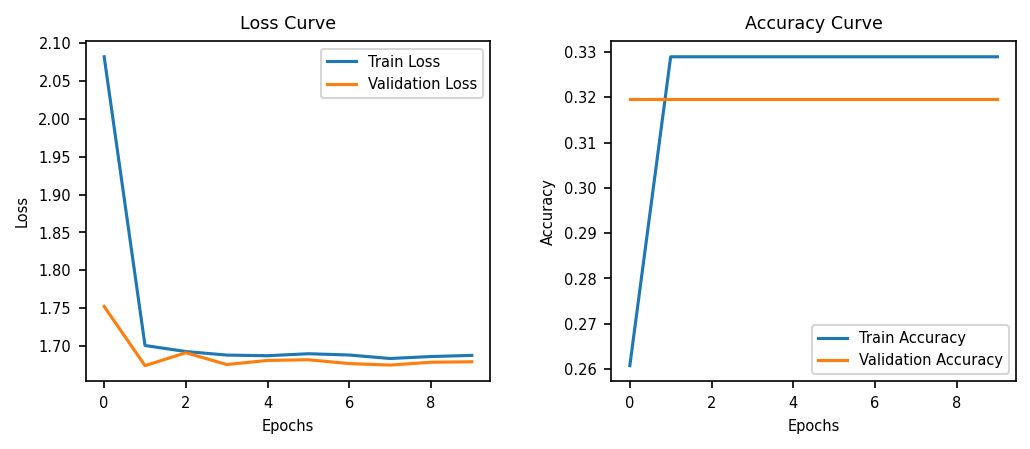

In [12]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 7}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=150)

ax[0].plot(history.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Loss Curve')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Accuracy Curve')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.subplots_adjust(wspace=0.3)
plt.show()